Augumentation(Shift)

letter_list :  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 

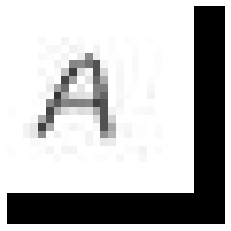

[[[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [2

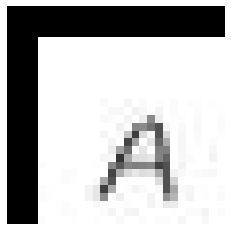

In [9]:
import numpy as np
import os
import cv2 as cv
from sklearn import utils
import matplotlib as mpl
import matplotlib.pyplot as plt

letter_class=[10,11,12,13,14,15,16,17,18,19,20, 21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]
letter_list=np.zeros((1,785))
rd_data=np.zeros((28,28))
lu_data=np.zeros((28,28))

os.chdir('../공용')
loaded_data=np.loadtxt('./emnist-byclass-train', delimiter=",",dtype='uint8')
print('letter_list : ',letter_list)
for i in range(0,len(loaded_data)):
    if loaded_data[i][0] in letter_class:
        letter_list=np.vstack([letter_list,loaded_data[i]])

letter_list=np.delete(letter_list,0,axis=0)        
letter_label,letter_data=np.split(letter_list,[1],axis=1)


letter_data=letter_data.reshape(-1,28,28)




#왼쪽 위로 4픽셀씩 이동
def mv_lu(data):
    mv_leftup=np.float32([[1,0,-4],[0,1,-4]])
    img=cv.warpAffine(data,mv_leftup,(28,28),borderValue=255)
    return img.reshape((28,28,1))


#오른쪽 아래로 4픽셀씩 이동
def mv_rd(data):
    mv_rightdown=np.float32([[1,0,4],[0,1,4]])
    img=cv.warpAffine(data,mv_rightdown,(28,28),borderValue=255)
    return img.reshape((28,28,1))


print(mv_lu(letter_data[4]))
plt.imshow(mv_lu(letter_data[4]),cmap="binary")
plt.axis('off')
plt.show()

print(mv_rd(letter_data[4]))
plt.imshow(mv_rd(letter_data[4]),cmap="binary")
plt.axis('off')
plt.show()



os.chdir('../')